In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Acquire data

In [63]:
train_df = pd.read_csv('train_auto.csv',index_col="INDEX")

In [10]:
test_df = pd.read_csv('test_auto.csv',index_col="INDEX")

# Data description

In [36]:
test_df.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [33]:
print(len(train_df.columns.values)) # number of features

25


In [11]:
print(train_df.columns.values)

['TARGET_FLAG' 'TARGET_AMT' 'KIDSDRIV' 'AGE' 'HOMEKIDS' 'YOJ' 'INCOME'
 'PARENT1' 'HOME_VAL' 'MSTATUS' 'SEX' 'EDUCATION' 'JOB' 'TRAVTIME'
 'CAR_USE' 'BLUEBOOK' 'TIF' 'CAR_TYPE' 'RED_CAR' 'OLDCLAIM' 'CLM_FREQ'
 'REVOKED' 'MVR_PTS' 'CAR_AGE' 'URBANICITY']


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8161 entries, 1 to 10302
Data columns (total 25 columns):
TARGET_FLAG    8161 non-null int64
TARGET_AMT     8161 non-null float64
KIDSDRIV       8161 non-null int64
AGE            8155 non-null float64
HOMEKIDS       8161 non-null int64
YOJ            7707 non-null float64
INCOME         7716 non-null object
PARENT1        8161 non-null object
HOME_VAL       7697 non-null object
MSTATUS        8161 non-null object
SEX            8161 non-null object
EDUCATION      8161 non-null object
JOB            7635 non-null object
TRAVTIME       8161 non-null int64
CAR_USE        8161 non-null object
BLUEBOOK       8161 non-null object
TIF            8161 non-null int64
CAR_TYPE       8161 non-null object
RED_CAR        8161 non-null object
OLDCLAIM       8161 non-null object
CLM_FREQ       8161 non-null int64
REVOKED        8161 non-null object
MVR_PTS        8161 non-null int64
CAR_AGE        7651 non-null float64
URBANICITY     8161 non-null ob

12 categorical features : URBANICITY, REVOKED, PARENT1, MSTATUS, SEX, KIDSDRIV, EDUCATION, JOB, CAR_USE, CAR_TYPE, RED_CAR, TARGET_FLAG

13 numerical features (including two target features) : CAR_AGE, MVR_PTS, TRAVTIME, YOJ, AGE, BLUEBOOK, TIF, OLDCLAIM, CLM_FREQ, HOMEKIDS, HOME_VAL, TARGET_AMT, INCOME

features to convert from string type: 

boolean features : MSTATUS, SEX, PARENT1, URBANICIY, RED_CAR

numerical continuous features: INCOME, HOME_VAL, BLUEBOOK, OLDCLAIM

In [39]:
for col in train_df:
  print(col,train_df[col].unique())

TARGET_FLAG [0 1]
TARGET_AMT [   0.        2946.        4021.        ...  471.1154581 3135.
 1815.205097 ]
KIDSDRIV [0 1 2 3 4]
AGE [60. 43. 35. 51. 50. 34. 54. 37. 53. 55. 45. 39. 42. 31. 28. 48. 47. 44.
 33. 32. 40. 49. 52. 41. 56. 38. 63. 59. 46. 30. 29. 58. 36. 66. 61. 62.
 80. 57. 64. nan 25. 27. 26. 20. 21. 19. 72. 69. 24. 67. 23. 65. 70. 22.
 17. 16. 81. 73. 68. 18. 76.]
HOMEKIDS [0 1 2 3 4 5]
YOJ [11. 10. 14. nan 12.  7.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  3.
  4.  2. 19.  1.]
INCOME ['$67,349 ' '$91,449 ' '$16,039 ' ... '$107,204 ' '$43,445 ' '$53,235 ']
PARENT1 ['No' 'Yes']
HOME_VAL ['$0 ' '$257,252 ' '$124,191 ' ... '$332,591 ' '$149,248 ' '$197,017 ']
MSTATUS ['z_No' 'Yes']
SEX ['M' 'z_F']
EDUCATION ['PhD' 'z_High School' '<High School' 'Bachelors' 'Masters']
JOB ['Professional' 'z_Blue Collar' 'Clerical' 'Doctor' 'Lawyer' 'Manager' nan
 'Home Maker' 'Student']
TRAVTIME [ 14  22   5  32  36  46  33  44  34  48  15  25  64  43  42  27  29  52
   8  26  16  30  37  1

In [74]:
cash_features = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

for feature in cash_features : 
    train_df[feature] = train_df[feature].replace(to_replace ="[\$,]", value = '', regex = True).astype(float)

# Errors and missing values

some values have errors ("_z" or "<" added at the begining), let's fix that

In [78]:
train_df = train_df.replace(to_replace =['^z_','^<'], value = '', regex = True)

In [45]:
for col in df_updated:
  print(col,df_updated[col].unique())

TARGET_FLAG [0 1]
TARGET_AMT [   0.        2946.        4021.        ...  471.1154581 3135.
 1815.205097 ]
KIDSDRIV [0 1 2 3 4]
AGE [60. 43. 35. 51. 50. 34. 54. 37. 53. 55. 45. 39. 42. 31. 28. 48. 47. 44.
 33. 32. 40. 49. 52. 41. 56. 38. 63. 59. 46. 30. 29. 58. 36. 66. 61. 62.
 80. 57. 64. nan 25. 27. 26. 20. 21. 19. 72. 69. 24. 67. 23. 65. 70. 22.
 17. 16. 81. 73. 68. 18. 76.]
HOMEKIDS [0 1 2 3 4 5]
YOJ [11. 10. 14. nan 12.  7.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  3.
  4.  2. 19.  1.]
INCOME ['$67,349 ' '$91,449 ' '$16,039 ' ... '$107,204 ' '$43,445 ' '$53,235 ']
PARENT1 ['No' 'Yes']
HOME_VAL ['$0 ' '$257,252 ' '$124,191 ' ... '$332,591 ' '$149,248 ' '$197,017 ']
MSTATUS ['No' 'Yes']
SEX ['M' 'F']
EDUCATION ['PhD' 'High School' 'Bachelors' 'Masters']
JOB ['Professional' 'Blue Collar' 'Clerical' 'Doctor' 'Lawyer' 'Manager' nan
 'Home Maker' 'Student']
TRAVTIME [ 14  22   5  32  36  46  33  44  34  48  15  25  64  43  42  27  29  52
   8  26  16  30  37  12  38  65  18  47  10  

# Blank, null or empty values

In [49]:
train_df.isna().any()[lambda x: x]

AGE         True
YOJ         True
INCOME      True
HOME_VAL    True
JOB         True
CAR_AGE     True
dtype: bool

In [53]:
test_df.isna().any()[lambda x: x]

['TARGET_FLAG', 'TARGET_AMT', 'AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'JOB', 'CAR_AGE']


these features have contain nan values in train and test set:  'AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'JOB', 'CAR_AGE'

In [86]:
# percent of missing values 
features_nan = ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE', 'JOB']

for feature in features_nan :
    
    print(f'Percent of missing {feature} records is %.2f%%' %((train_df[feature].isnull().sum()/train_df.shape[0])*100))

Percent of missing AGE records is 0.07%
Percent of missing YOJ records is 5.56%
Percent of missing INCOME records is 5.45%
Percent of missing HOME_VAL records is 5.69%
Percent of missing CAR_AGE records is 6.25%
Percent of missing JOB records is 6.45%


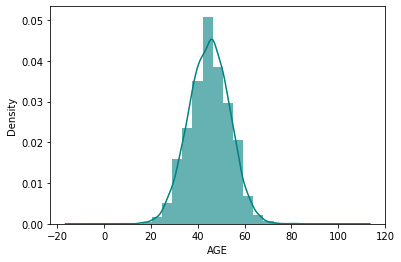

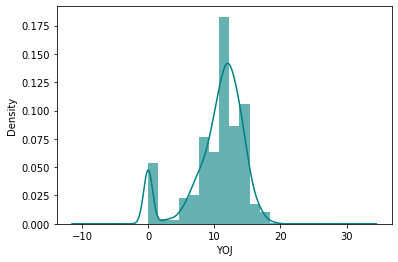

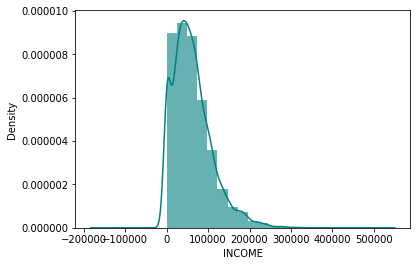

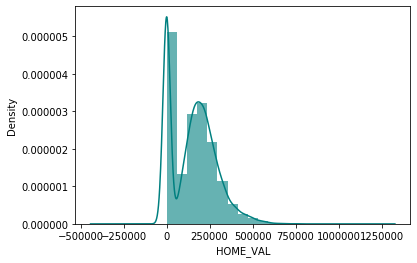

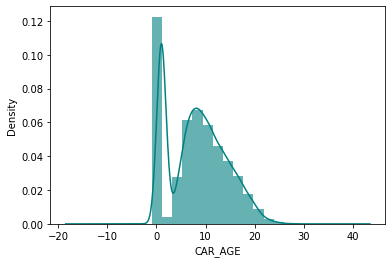

In [95]:
for feature in features_nan[:-1] :
    
    ax = train_df[feature].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
    train_df[feature].plot(kind='density', color='teal')
    ax.set(xlabel=feature)
    plt.show()

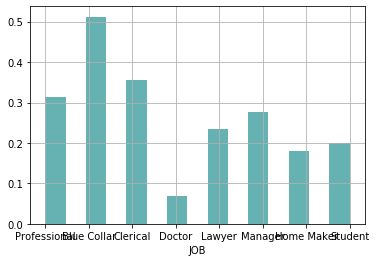

In [94]:
ax = train_df["JOB"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax.set(xlabel="JOB")
plt.show()

for 'AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE' features, distributions are (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.


In [96]:
for feature in features_nan[:-1] :

    train_df[feature].fillna(train_df[feature].median(skipna=True), inplace=True)


For feature "Job", we will replace with the most prominent value : "Blue Collar"

In [99]:
train_df["JOB"].fillna('Blue Collar', inplace=True)

## Distribution of numerical feature values

In [76]:
train_df.describe()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716.000000,7697.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,61898.094609,154867.289723,33.485725,15709.899522,5.351305,4037.076216,0.798554,1.695503,8.328323
std,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,47572.682808,129123.774574,15.908333,8419.734075,4.146635,8777.139104,1.158453,2.147112,5.700742
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,-3.000000
25%,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,28097.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,54028.000000,161160.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,85986.000000,238724.000000,44.000000,20850.000000,7.000000,4636.000000,2.000000,3.000000,12.000000
max,1.000000,107586.136200,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


In [57]:
test_df.describe()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,0.0,0.0,2141.000000,2140.000000,2141.000000,2047.000000,2141.000000,2141.000000,2141.000000,2141.000000,2012.000000
mean,NaN,NaN,0.162541,45.016822,0.717422,10.379091,33.152265,5.244745,0.808968,1.765997,8.183400
std,NaN,NaN,0.486949,8.525006,1.116579,4.170008,15.722393,3.971026,1.137481,2.203413,5.766263
min,NaN,NaN,0.000000,17.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,NaN,NaN,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,NaN,NaN,0.000000,51.000000,1.000000,13.000000,43.000000,7.000000,2.000000,3.000000,12.000000
max,NaN,NaN,3.000000,73.000000,5.000000,19.000000,105.000000,25.000000,5.000000,12.000000,26.000000


Distribution of categorical features

In [79]:
train_df.describe(include=['O'])

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
count,8161,8161,8161,8161,7635,8161,8161,8161,8161,8161
unique,2,2,2,4,8,2,6,2,2,2
top,No,Yes,F,High School,Blue Collar,Private,SUV,no,No,Highly Urban/ Urban
freq,7084,4894,4375,3533,1825,5132,2294,5783,7161,6492


## Transforming features

In [100]:
train_df.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,No,...,14230.0,11,Minivan,yes,4461.0,2,No,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,No,...,14940.0,1,Minivan,yes,0.0,0,No,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,...,4010.0,4,SUV,no,38690.0,2,No,3,10.0,Highly Urban/ Urban
5,0,0.0,0,51.0,0,14.0,54028.0,No,306251.0,Yes,...,15440.0,7,Minivan,yes,0.0,0,No,0,6.0,Highly Urban/ Urban
6,0,0.0,0,50.0,0,11.0,114986.0,No,243925.0,Yes,...,18000.0,1,SUV,no,19217.0,2,Yes,3,17.0,Highly Urban/ Urban


In [101]:
for col in train_df:
  print(col,train_df[col].unique())

TARGET_FLAG [0 1]
TARGET_AMT [   0.        2946.        4021.        ...  471.1154581 3135.
 1815.205097 ]
KIDSDRIV [0 1 2 3 4]
AGE [60. 43. 35. 51. 50. 34. 54. 37. 53. 55. 45. 39. 42. 31. 28. 48. 47. 44.
 33. 32. 40. 49. 52. 41. 56. 38. 63. 59. 46. 30. 29. 58. 36. 66. 61. 62.
 80. 57. 64. 25. 27. 26. 20. 21. 19. 72. 69. 24. 67. 23. 65. 70. 22. 17.
 16. 81. 73. 68. 18. 76.]
HOMEKIDS [0 1 2 3 4 5]
YOJ [11. 10. 14. 12.  7.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  3.  4.
  2. 19.  1.]
INCOME [ 67349.  91449.  16039. ... 107204.  43445.  53235.]
PARENT1 ['No' 'Yes']
HOME_VAL [     0. 257252. 124191. ... 332591. 149248. 197017.]
MSTATUS ['No' 'Yes']
SEX ['M' 'F']
EDUCATION ['PhD' 'High School' 'Bachelors' 'Masters']
JOB ['Professional' 'Blue Collar' 'Clerical' 'Doctor' 'Lawyer' 'Manager'
 'Home Maker' 'Student']
TRAVTIME [ 14  22   5  32  36  46  33  44  34  48  15  25  64  43  42  27  29  52
   8  26  16  30  37  12  38  65  18  47  10  40  62  35  20  50  24  13
  31  28  11   9  49  

In [108]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_df, columns=["URBANICITY", "REVOKED", "PARENT1", "MSTATUS", "SEX", "KIDSDRIV", "EDUCATION", "JOB", "CAR_USE", "CAR_TYPE", "RED_CAR"])
training.drop('PARENT1_No', axis=1, inplace=True)
training.drop('MSTATUS_No', axis=1, inplace=True)
training.drop('REVOKED_No', axis=1, inplace=True)
training.drop('RED_CAR_no', axis=1, inplace=True)
training.drop('URBANICITY_Highly Urban/ Urban', axis=1, inplace=True)

In [107]:
training.columns

Index(['TARGET_FLAG', 'TARGET_AMT', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ',
       'MVR_PTS', 'CAR_AGE', 'URBANICITY_Highly Rural/ Rural',
       'URBANICITY_Highly Urban/ Urban', 'REVOKED_No', 'REVOKED_Yes',
       'PARENT1_No', 'PARENT1_Yes', 'MSTATUS_No', 'MSTATUS_Yes', 'SEX_F',
       'SEX_M', 'KIDSDRIV_0', 'KIDSDRIV_1', 'KIDSDRIV_2', 'KIDSDRIV_3',
       'KIDSDRIV_4', 'EDUCATION_Bachelors', 'EDUCATION_High School',
       'EDUCATION_Masters', 'EDUCATION_PhD', 'JOB_Blue Collar', 'JOB_Clerical',
       'JOB_Doctor', 'JOB_Home Maker', 'JOB_Lawyer', 'JOB_Manager',
       'JOB_Professional', 'JOB_Student', 'CAR_USE_Commercial',
       'CAR_USE_Private', 'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck',
       'CAR_TYPE_Pickup', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car',
       'CAR_TYPE_Van', 'RED_CAR_no', 'RED_CAR_yes'],
      dtype='object')

In [110]:
train_df = training

In [112]:
train_df.describe().columns

Index(['TARGET_FLAG', 'TARGET_AMT', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ',
       'MVR_PTS', 'CAR_AGE', 'URBANICITY_Highly Rural/ Rural', 'REVOKED_Yes',
       'PARENT1_Yes', 'MSTATUS_Yes', 'SEX_F', 'SEX_M', 'KIDSDRIV_0',
       'KIDSDRIV_1', 'KIDSDRIV_2', 'KIDSDRIV_3', 'KIDSDRIV_4',
       'EDUCATION_Bachelors', 'EDUCATION_High School', 'EDUCATION_Masters',
       'EDUCATION_PhD', 'JOB_Blue Collar', 'JOB_Clerical', 'JOB_Doctor',
       'JOB_Home Maker', 'JOB_Lawyer', 'JOB_Manager', 'JOB_Professional',
       'JOB_Student', 'CAR_USE_Commercial', 'CAR_USE_Private',
       'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'RED_CAR_yes'],
      dtype='object')

# Correlations 

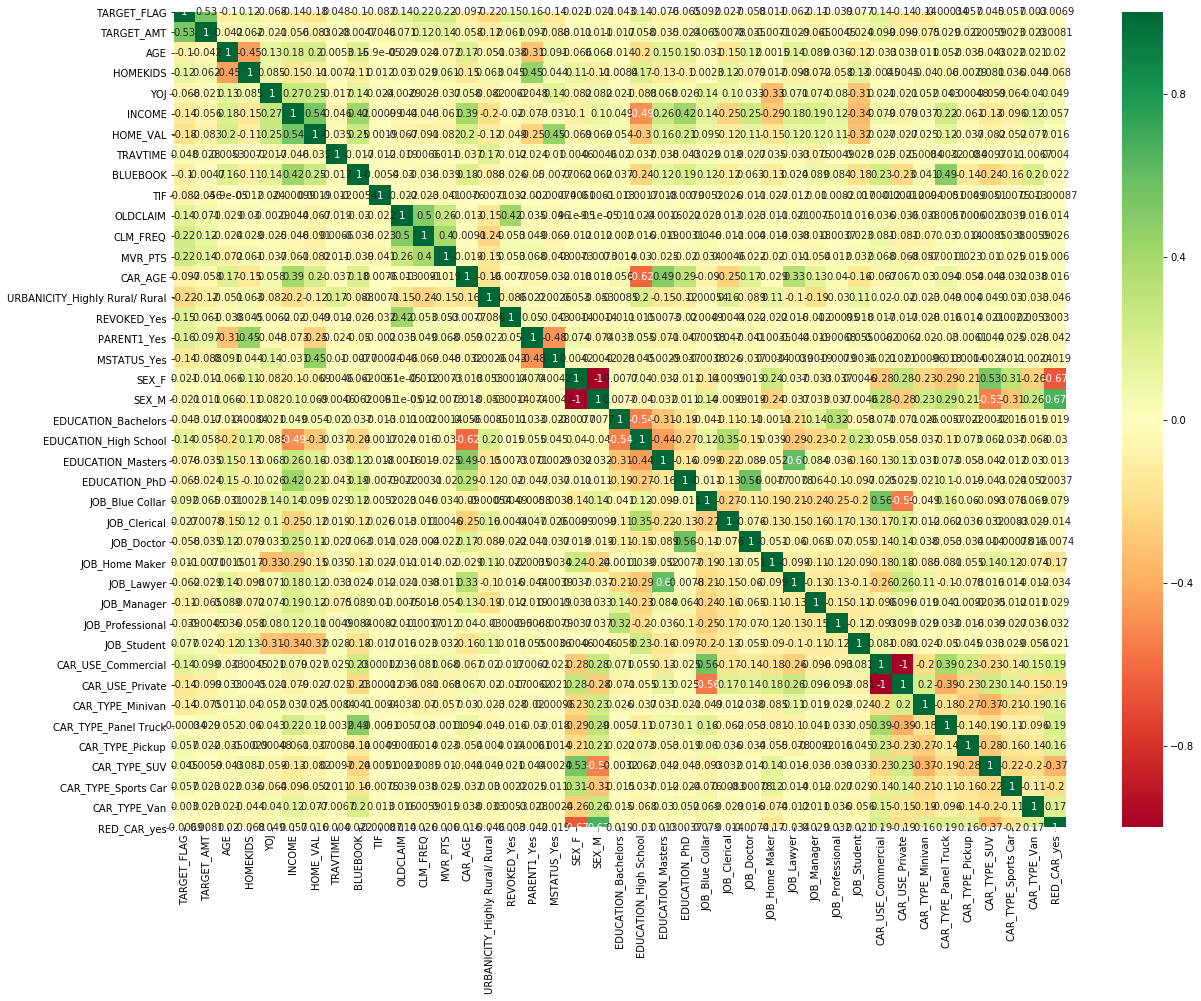

In [122]:
features = ['TARGET_FLAG', 'TARGET_AMT','AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ',
       'MVR_PTS', 'CAR_AGE', 'URBANICITY_Highly Rural/ Rural', 'REVOKED_Yes',
       'PARENT1_Yes', 'MSTATUS_Yes', 'SEX_F', 'SEX_M',
       'EDUCATION_Bachelors', 'EDUCATION_High School', 'EDUCATION_Masters',
       'EDUCATION_PhD', 'JOB_Blue Collar', 'JOB_Clerical', 'JOB_Doctor',
       'JOB_Home Maker', 'JOB_Lawyer', 'JOB_Manager', 'JOB_Professional',
       'JOB_Student', 'CAR_USE_Commercial', 'CAR_USE_Private',
       'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'RED_CAR_yes',
                    ]

X = train_df[features]

plt.subplots(figsize=(20, 15))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Model

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_validate

In [128]:
selected_features = ['AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ',
       'MVR_PTS', 'CAR_AGE', 'URBANICITY_Highly Rural/ Rural', 'REVOKED_Yes',
       'PARENT1_Yes', 'MSTATUS_Yes', 'SEX_F', 'SEX_M',
       'EDUCATION_Bachelors', 'EDUCATION_High School', 'EDUCATION_Masters',
       'EDUCATION_PhD', 'JOB_Blue Collar', 'JOB_Clerical', 'JOB_Doctor',
       'JOB_Home Maker', 'JOB_Lawyer', 'JOB_Manager', 'JOB_Professional',
       'JOB_Student', 'CAR_USE_Commercial', 'CAR_USE_Private',
       'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'RED_CAR_yes',]


X = train_df[selected_features]
y = train_df['TARGET_FLAG']

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.736 (+/-0.006)
LogisticRegression average log_loss: 0.545 (+/-0.007)
LogisticRegression average auc: 0.664 (+/-0.018)
